# Linear Regression

| Condition                                                       | Why It Matters                                                                                           |
| --------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------- |
| 🔢 **You want to predict a continuous value**                   | Linear regression is for regression tasks, not classification (e.g., predict price, score, weight, etc.) |
| ➕ **There’s a linear relationship between features and target** | The model assumes the target is a **weighted sum** of features                                           |
| 🧮 **Model interpretability is important**                      | Coefficients tell you how each feature affects the target                                                |
| 🧪 **Data is clean and doesn’t have extreme outliers**          | Outliers can heavily influence linear regression                                                         |
| 📉 **You want a fast, simple baseline model**                   | It's quick to train and easy to evaluate                                                                 |


| Problem                | Target to Predict     | Example Features        |
| ---------------------- | --------------------- | ----------------------- |
| House price prediction | Price in dollars      | Size, location, rooms   |
| Health cost estimation | Insurance cost        | Age, BMI, smoker status |
| Student performance    | Final score           | Study time, absences    |
| Sales forecasting      | Revenue or units sold | Ad spending, month      |


| Situation                                         | Try Instead                                                             |
| ------------------------------------------------- | ----------------------------------------------------------------------- |
| ❌ Target is categorical                           | Use **logistic regression** or **classification models**                |
| ❌ Data has nonlinear relationships                | Try **polynomial regression**, **tree-based models**, or **SVR**        |
| ❌ You have many irrelevant or correlated features | Use **regularized models** like **Ridge** or **Lasso**                  |
| ❌ Data has many outliers                          | Use **robust regression** methods or **tree models** like Random Forest |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import KFold

In [2]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Median house value

In [3]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# Train linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [5]:
y_pred = reg.predict(X_test)

In [6]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

| Metric               | Measures                | Good Value | Notes                            |
| -------------------- | ----------------------- | ---------- | -------------------------------- |
| `mean_squared_error` | Avg. squared error      | Close to 0 | More sensitive to outliers       |
| `r2_score`           | % of variance explained | Close to 1 | Can go negative if model is poor |


| Aspect                      | `mean_squared_error` (MSE)                                             | `r2_score` (R-squared)                                              |
| --------------------------- | ---------------------------------------------------------------------- | ------------------------------------------------------------------- |
| **What it measures**        | The **average squared difference** between predicted and actual values | The **proportion of variance** in the target explained by the model |
| **Formula**                 | $\text{MSE} = \frac{1}{n} \sum (y_i - \hat{y}_i)^2$                    | $R^2 = 1 - \frac{\text{SS}_{res}}{\text{SS}_{tot}}$                 |
| **Output range**            | $[0, \infty)$                                                          | $(-\infty, 1]$                                                      |
| **Ideal value**             | 0 (lower is better)                                                    | 1 (higher is better)                                                |
| **Worst-case behavior**     | Can grow arbitrarily large if predictions are very bad                 | Can go **negative** if model is worse than just predicting the mean |
| **Unit**                    | Same as target variable squared (e.g., \$²)                            | Unitless                                                            |
| **Sensitivity to outliers** | **High** (squares errors, so large ones dominate)                      | Moderate                                                            |
| **Interpretability**        | Harder to interpret directly due to squared units                      | Easy to interpret: “Model explains X% of the variation”             |
| **Use case**                | When you care about **penalizing large errors**                        | When you want to measure **overall explanatory power**              |
| **Model comparison**        | Good for comparing different models **on the same dataset**            | Good for comparing models’ **goodness-of-fit** across datasets      |
| **Common in**               | Loss functions (training), optimization, RMSE                          | Reporting model quality, regression summaries                       |


Fold 1: R2 = 0.5808, MSE = 0.5590
Fold 2: R2 = 0.5702, MSE = 0.5531
Fold 3: R2 = 0.6344, MSE = 0.4812
Fold 4: R2 = 0.5945, MSE = 0.5742
Fold 5: R2 = 0.6156, MSE = 0.4890
Fold 6: R2 = 0.6027, MSE = 0.5284
Fold 7: R2 = 0.5907, MSE = 0.5512
Fold 8: R2 = 0.6399, MSE = 0.4748
Fold 9: R2 = 0.5778, MSE = 0.5644
Fold 10: R2 = 0.5941, MSE = 0.5500

✅ Mean R2: 0.6000752228653956
✅ Mean MSE: 0.5325266619260598


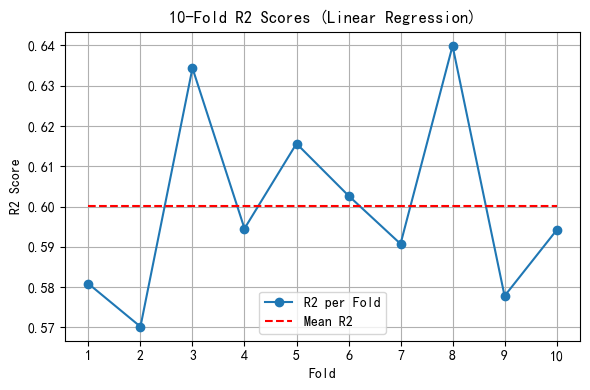

In [9]:
n_splits=10

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Prepare model
model = LinearRegression()

# Store scores
r2_scores = []
mse_scores = []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    r2 = r2_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    
    r2_scores.append(r2)
    mse_scores.append(mse)
    
    print(f"Fold {fold}: R2 = {r2:.4f}, MSE = {mse:.4f}")

# Summary
print("\n✅ Mean R2:", np.mean(r2_scores))
print("✅ Mean MSE:", np.mean(mse_scores))

# Visualize R2 scores
plt.figure(figsize=(6, 4))
plt.plot(range(1, n_splits + 1), r2_scores, marker='o', label='R2 per Fold')
plt.hlines(np.mean(r2_scores), 1, n_splits, colors='red', linestyles='--', label='Mean R2')
plt.title(f"{n_splits}-Fold R2 Scores (Linear Regression)")
plt.xlabel("Fold")
plt.ylabel("R2 Score")
plt.xticks(range(1, n_splits + 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

In [12]:
print(cv_results)

[0.58663426 0.60423156 0.6049065  0.62134559 0.60802458 0.59595722]


In [13]:
print(np.quantile(cv_results, [0.025, 0.975]))

[0.58779963 0.61968046]
